In [93]:
#loading requirements for data cleaning and visualization

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
import warnings
warnings.filterwarnings('ignore')

#loading plotly packages for visualizations
import plotly.express as px
import plotly.io as pio
pio.templates
import plotly.offline as py
from plotly.figure_factory import create_table

In [94]:
dataset = pd.read_csv("Nigerian_Car_Prices.csv")

In [95]:
dataset.transpose()

,0,1,2,3,4,5,6,7,8,9,...,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094
Make,Toyota,Lexus,Mercedes-Benz,Lexus,Mercedes-Benz,Mercedes-Benz,Lexus,Lexus,Mercedes-Benz,Lexus,...,Honda,Toyota,Toyota,Mercedes-Benz,Toyota,Honda,Toyota,Honda,Toyota,Toyota
Year of manufacture,2007.00,NaN,2008.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2013.00,2012.00,2007.00,2008.00,2005.00,2004.00,2005.00,2006.00,2007.00,2013.00
Condition,Nigerian Used,NaN,Nigerian Used,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Nigerian Used,Nigerian Used,Nigerian Used,Nigerian Used,Foreign Used,Nigerian Used,Nigerian Used,Nigerian Used,Nigerian Used,Foreign Used
Mileage,166418.00,138024.00,376807.00,213362.00,106199.00,87660.00,191411.00,59092.00,89423.00,184827.00,...,103704.00,154109.00,157462.00,15032.00,452660.00,207446.00,106914.00,247149.00,249325.00,235184.00
Engine Size,2400.00,NaN,3000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.00,24.00,3500.00,3500.00,2200.00,3500.00,1800.00,1800.00,2500.00,2500.00
Fuel,Petrol,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Petrol,Petrol,Petrol,Petrol,Diesel,Petrol,Petrol,Petrol,Petrol,Petrol
Transmission,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,Automatic,...,Automatic,Automatic,Automatic,Automatic,Manual,Automatic,Automatic,Automatic,Automatic,Automatic
Price,"3,120,000","5,834,000","3,640,000","3,594,000","8,410,000","5,554,000","3,706,000","8,410,000","6,506,000","4,000,000",...,"5,625,000","4,500,000","1,687,500","3,375,000","2,812,500","1,125,000","2,643,750","1,462,500","2,475,000","6,300,000"
Build,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,SUV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
dataset.shape

(4095, 10)

In [97]:
dataset.head(10)

,Unnamed: 0,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price,Build
0,0,Toyota,2007.00,Nigerian Used,166418.00,2400.00,Petrol,Automatic,"3,120,000",NaN
1,1,Lexus,NaN,NaN,138024.00,NaN,NaN,Automatic,"5,834,000",NaN
2,2,Mercedes-Benz,2008.00,Nigerian Used,376807.00,3000.00,Petrol,Automatic,"3,640,000",NaN
3,3,Lexus,NaN,NaN,213362.00,NaN,NaN,Automatic,"3,594,000",NaN
4,4,Mercedes-Benz,NaN,NaN,106199.00,NaN,NaN,Automatic,"8,410,000",NaN
5,5,Mercedes-Benz,NaN,NaN,87660.00,NaN,NaN,Automatic,"5,554,000",NaN
6,6,Lexus,NaN,NaN,191411.00,NaN,NaN,Automatic,"3,706,000",NaN
7,7,Lexus,NaN,NaN,59092.00,NaN,NaN,Automatic,"8,410,000",NaN
8,8,Mercedes-Benz,NaN,NaN,89423.00,NaN,NaN,Automatic,"6,506,000",NaN
9,9,Lexus,NaN,NaN,184827.00,NaN,NaN,Automatic,"4,000,000",NaN


In [98]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095 entries, 0 to 4094
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           4095 non-null   int64  
 1   Make                 4095 non-null   object 
 2   Year of manufacture  3617 non-null   float64
 3   Condition            3616 non-null   object 
 4   Mileage              4024 non-null   float64
 5   Engine Size          3584 non-null   float64
 6   Fuel                 3607 non-null   object 
 7   Transmission         4075 non-null   object 
 8   Price                4095 non-null   object 
 9   Build                1127 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 320.0+ KB


from the informatio gathered, the price needs to be transformed to float, build and  unnamed columns would be dropped

In [99]:
#converting Price column from object to numeric datatype and convert numerical values to categorical in Senior Citizen
dataset["Price"]  = dataset["Price"].astype(float)

ValueError: could not convert string to float: '3,120,000'

In [100]:
dataset["Price"]

0       3,120,000
1       5,834,000
2       3,640,000
3       3,594,000
4       8,410,000
          ...    
4090    1,125,000
4091    2,643,750
4092    1,462,500
4093    2,475,000
4094    6,300,000
Name: Price, Length: 4095, dtype: object

The price column contains values separated with commas, hence the code above returns NaN. here is how to fix this

In [101]:
#to remove "," in the prices
dataset.Price = dataset.Price.str.replace(',', '').astype(float)


In [102]:
dataset.Price

0      3120000.00
1      5834000.00
2      3640000.00
3      3594000.00
4      8410000.00
          ...    
4090   1125000.00
4091   2643750.00
4092   1462500.00
4093   2475000.00
4094   6300000.00
Name: Price, Length: 4095, dtype: float64

In [103]:
dataset.describe()

,Unnamed: 0,Year of manufacture,Mileage,Engine Size,Price
count,4095.00,3617.00,4024.00,3584.00,4095.00
mean,2047.00,2007.90,182533.66,3274.98,4271287.73
std,1182.27,4.30,210923.30,7693.49,4900063.74
min,0.00,1992.00,1.00,3.00,458000.00
25%,1023.50,2005.00,102064.00,2000.00,1872000.00
50%,2047.00,2008.00,161352.50,2500.00,2940000.00
75%,3070.50,2011.00,231952.25,3500.00,4725000.00
max,4094.00,2021.00,9976050.00,371000.00,58800000.00


In [104]:
dataset.loc[dataset["Engine Size"] >= 5700]

,Unnamed: 0,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price,Build
54,54,Lexus,2016.00,Nigerian Used,107355.00,5700.00,Petrol,Automatic,42000000.00,SUV
81,81,Fiat,2000.00,Foreign Used,286241.00,24000.00,Diesel,Manual,3675000.00,NaN
95,95,Fiat,2000.00,Foreign Used,286241.00,24000.00,Diesel,Manual,3675000.00,NaN
122,122,Tata,2008.00,Foreign Used,NaN,371000.00,Diesel,Manual,17850000.00,NaN
176,176,Lexus,2008.00,Foreign Used,200262.00,35000.00,Petrol,Automatic,4680000.00,NaN
...,...,...,...,...,...,...,...,...,...,...
3415,3415,Honda,2012.00,Nigerian Used,180989.00,16000.00,Petrol,Automatic,2415000.00,NaN
3440,3440,Honda,2012.00,Nigerian Used,180989.00,16000.00,Petrol,Automatic,2415000.00,NaN
3870,3870,Honda,1996.00,Nigerian Used,234412.00,22000.00,Petrol,Automatic,735000.00,NaN
3996,3996,Acura,2002.00,Nigerian Used,236451.00,35000.00,Petrol,Automatic,1462500.00,NaN


Engine size is usuaaly entered on Litres or cc, in the engine size columns, sizes above four figures are to be divided by 10, size below four figures will be multiplied by 10 and sizes below 2 figures bu

In [105]:
# define the function to apply
def convert_to_cc(val):
    if len(str(val))-2 == 1:
        return val * 1000
    elif len(str(val)) -2 ==2:
        return val*100
    elif len(str(val))-2 == 3:
        return val * 10
    elif len(str(val)) - 2 ==5:
        return val / 10
    elif len(str(val)) - 2 == 6:
        return val/ 100
    else:
        return val

In [106]:
# apply the 'divide_values' function on the 'Values' column
dataset['Engine Size'] = dataset['Engine Size'].apply(convert_to_cc)



In [107]:
dataset.loc[dataset["Engine Size"] < 1000]

,Unnamed: 0,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price,Build


In [108]:
#creating a new dataset
new_columns = ['Make', 'Year of manufacture', 'Condition', 'Mileage', 'Engine Size', 'Fuel', 'Transmission', 'Price']
df= dataset.drop([c for c in dataset.columns if c not in new_columns], axis = 'columns')

In [109]:
dataset["Engine Size"][4003]

1844.21

In [110]:
df.tail()

,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price
4090,Honda,2004.00,Nigerian Used,207446.00,3500.00,Petrol,Automatic,1125000.00
4091,Toyota,2005.00,Nigerian Used,106914.00,1800.00,Petrol,Automatic,2643750.00
4092,Honda,2006.00,Nigerian Used,247149.00,1800.00,Petrol,Automatic,1462500.00
4093,Toyota,2007.00,Nigerian Used,249325.00,2500.00,Petrol,Automatic,2475000.00
4094,Toyota,2013.00,Foreign Used,235184.00,2500.00,Petrol,Automatic,6300000.00


In [111]:
df.isnull().sum()

Make                     0
Year of manufacture    478
Condition              479
Mileage                 71
Engine Size            511
Fuel                   488
Transmission            20
Price                    0
dtype: int64

In [112]:
#drop na
df = df.dropna()
df.isnull().sum()

Make                   0
Year of manufacture    0
Condition              0
Mileage                0
Engine Size            0
Fuel                   0
Transmission           0
Price                  0
dtype: int64

In [113]:
df.shape

(3523, 8)

In [114]:
df

,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price
0,Toyota,2007.00,Nigerian Used,166418.00,2400.00,Petrol,Automatic,3120000.00
2,Mercedes-Benz,2008.00,Nigerian Used,376807.00,3000.00,Petrol,Automatic,3640000.00
30,Lexus,2008.00,Foreign Used,301265.00,3500.00,Petrol,Automatic,4680000.00
32,Lexus,2011.00,Nigerian Used,105546.00,4600.00,Petrol,Automatic,14040000.00
43,Lexus,2011.00,Foreign Used,211917.00,3500.00,Petrol,Automatic,6968000.00
...,...,...,...,...,...,...,...,...
4090,Honda,2004.00,Nigerian Used,207446.00,3500.00,Petrol,Automatic,1125000.00
4091,Toyota,2005.00,Nigerian Used,106914.00,1800.00,Petrol,Automatic,2643750.00
4092,Honda,2006.00,Nigerian Used,247149.00,1800.00,Petrol,Automatic,1462500.00
4093,Toyota,2007.00,Nigerian Used,249325.00,2500.00,Petrol,Automatic,2475000.00


In [115]:
df.groupby('Make')['Make'].agg('count')

Make
Acura              54
Audi               14
BMW                51
Changan             4
Chevrolet          25
Chrysler            7
Citroen             2
Daihatsu            1
Dodge              17
Fiat                2
Ford              175
GMC                 3
Honda             383
Hummer              2
Hyundai           145
Infiniti           36
Jaguar              9
Jeep                7
Kia                70
Land Rover         55
Lexus             400
Lincoln             3
MG                  2
Mazda              56
Mercedes-Benz     316
Mini                2
Mitsubishi         17
Nissan            143
Opel               10
Peugeot            33
Pontiac            21
Porsche             6
Renault             4
Rover               1
Seat                1
Skoda               3
SsangYong           1
Suzuki              4
Toyota           1368
Volkswagen         53
Volvo              17
Name: Make, dtype: int64

In [116]:
df.groupby('Condition')['Condition'].agg('count')

Condition
Brand New           5
Foreign Used     1068
Nigerian Used    2450
Name: Condition, dtype: int64

In [117]:
df.groupby('Fuel')['Fuel'].agg('count')

Fuel
Diesel        33
Electric       5
Hybrid        30
Petrol      3455
Name: Fuel, dtype: int64

In [118]:
df.groupby('Transmission')['Transmission'].agg('count')

Transmission
AMT            13
Automatic    3303
CVT            22
Manual        185
Name: Transmission, dtype: int64

In [119]:
df.groupby('Engine Size')['Engine Size'].agg('count').head(50)

Engine Size
1000.00      3
1100.00     12
1200.00      5
1300.00      8
1330.00      1
1400.00     30
1500.00     30
1600.00     94
1700.00      4
1800.00    440
1844.21      1
1900.00      4
2000.00    244
2100.00      5
2200.00     38
2300.00     30
2400.00    531
2500.00    252
2600.00      7
2700.00     57
2800.00      4
2900.00      5
3000.00    312
3200.00     24
3300.00    145
3400.00     17
3500.00    858
3600.00     31
3700.00     33
3800.00     13
4000.00     57
4100.00      1
4200.00      7
4300.00      1
4400.00     16
4500.00     15
4600.00     37
4700.00     67
4800.00      7
4900.00      1
5000.00     24
5300.00      1
5400.00      7
5500.00      9
5600.00     19
5700.00     14
6000.00      2
Name: Engine Size, dtype: int64

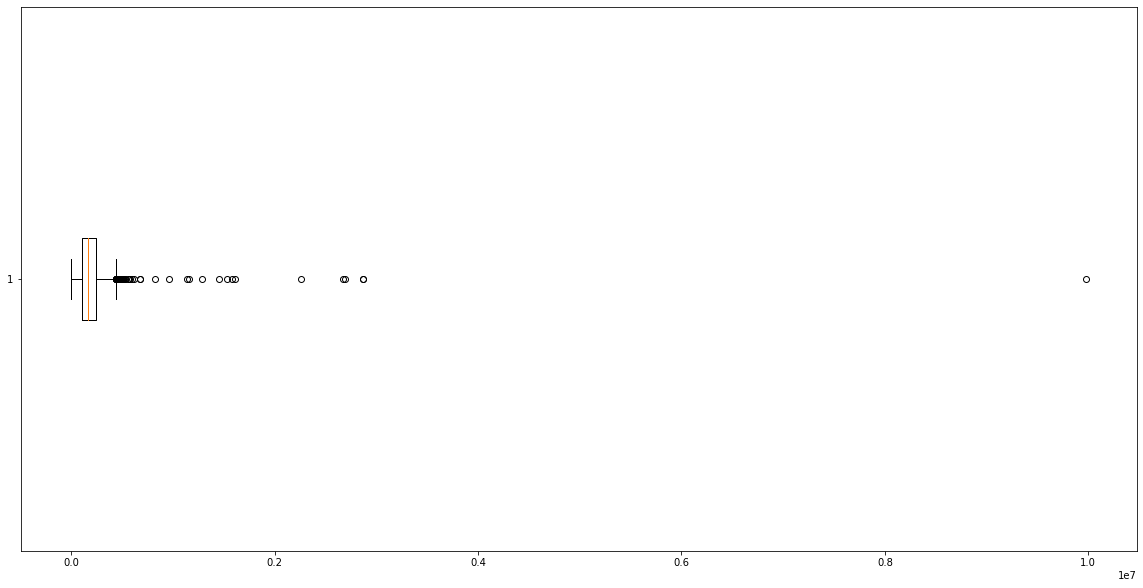

In [120]:
plt.boxplot(x = df["Mileage"], vert = False);

In [121]:
df.query("Price >= 2000000")

,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price
0,Toyota,2007.00,Nigerian Used,166418.00,2400.00,Petrol,Automatic,3120000.00
2,Mercedes-Benz,2008.00,Nigerian Used,376807.00,3000.00,Petrol,Automatic,3640000.00
30,Lexus,2008.00,Foreign Used,301265.00,3500.00,Petrol,Automatic,4680000.00
32,Lexus,2011.00,Nigerian Used,105546.00,4600.00,Petrol,Automatic,14040000.00
43,Lexus,2011.00,Foreign Used,211917.00,3500.00,Petrol,Automatic,6968000.00
...,...,...,...,...,...,...,...,...
4088,Mercedes-Benz,2008.00,Nigerian Used,15032.00,3500.00,Petrol,Automatic,3375000.00
4089,Toyota,2005.00,Foreign Used,452660.00,2200.00,Diesel,Manual,2812500.00
4091,Toyota,2005.00,Nigerian Used,106914.00,1800.00,Petrol,Automatic,2643750.00
4093,Toyota,2007.00,Nigerian Used,249325.00,2500.00,Petrol,Automatic,2475000.00


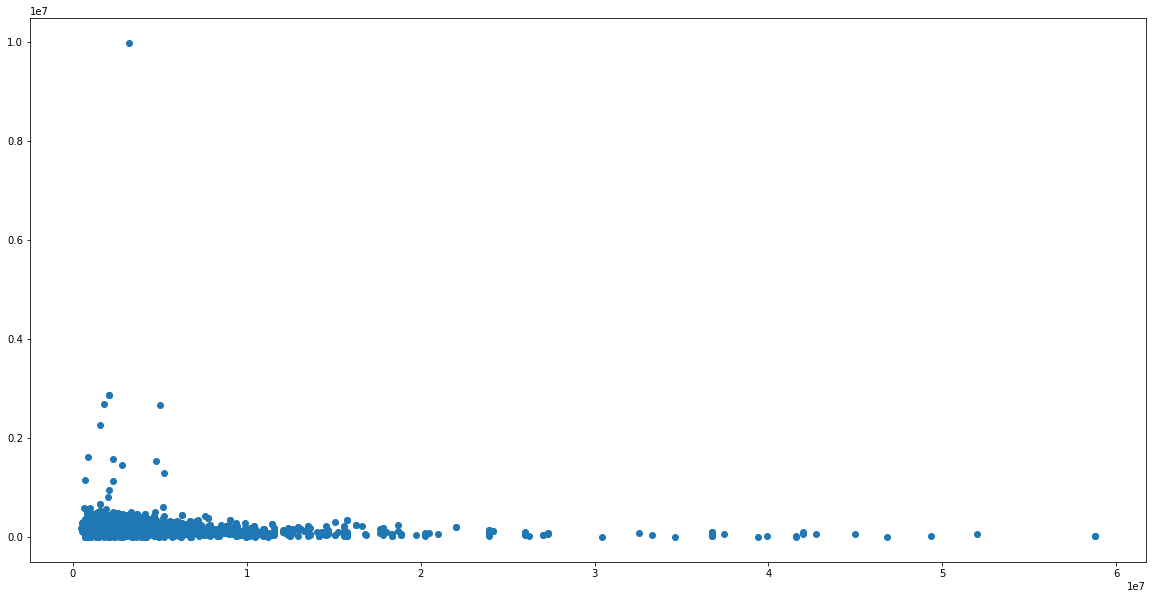

In [122]:
plt.scatter(df.Price, df.Mileage)

In [123]:
df.query("Mileage >= 4000000")

,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price
1014,Lexus,2008.00,Nigerian Used,9976050.00,3500.00,Petrol,Automatic,3255000.00


In [124]:
new_df = df.query("Mileage < 4000000")

In [125]:
new_df.shape

(3522, 8)

In [126]:
corr=new_df.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,Year of manufacture,Mileage,Engine Size,Price
Year of manufacture,1.00,-0.30,0.02,0.56
Mileage,-0.30,1.00,-0.02,-0.21
Engine Size,0.02,-0.02,1.00,0.24
Price,0.56,-0.21,0.24,1.00


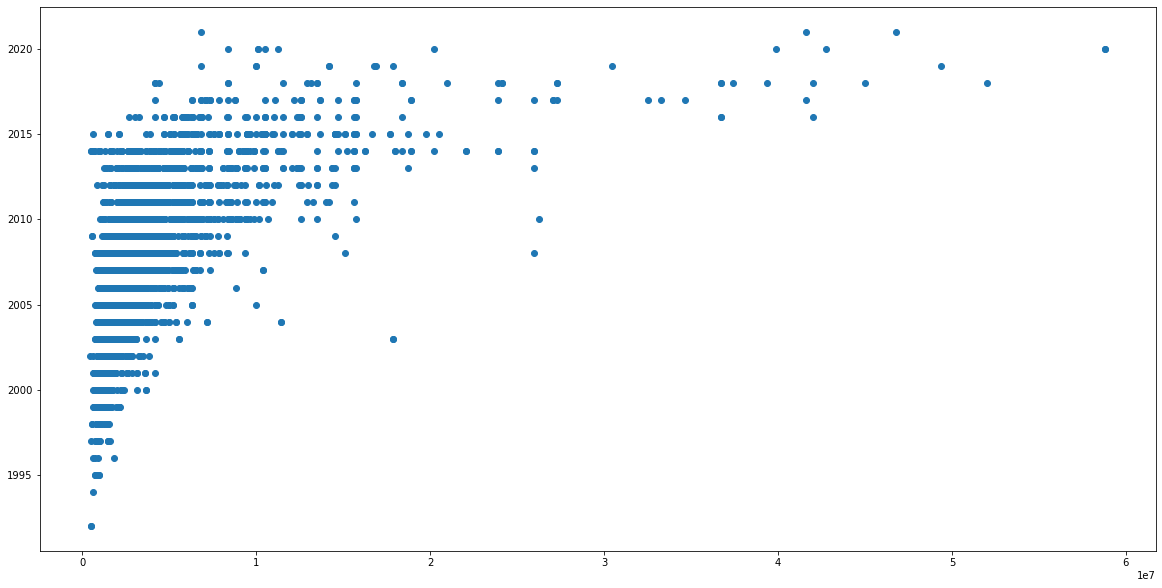

In [127]:
plt.scatter(df.Price, df['Year of manufacture'])

In [128]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

In [129]:
data_dict= new_df.to_dict(orient = "records")

In [146]:
data_dict[0:10]

[{'Make': 'Toyota',
  'Year of manufacture': 2007.0,
  'Condition': 'Nigerian Used',
  'Mileage': 166418.0,
  'Engine Size': 2400.0,
  'Fuel': 'Petrol',
  'Transmission': 'Automatic',
  'Price': 3120000.0},
 {'Make': 'Mercedes-Benz',
  'Year of manufacture': 2008.0,
  'Condition': 'Nigerian Used',
  'Mileage': 376807.0,
  'Engine Size': 3000.0,
  'Fuel': 'Petrol',
  'Transmission': 'Automatic',
  'Price': 3640000.0},
 {'Make': 'Lexus',
  'Year of manufacture': 2008.0,
  'Condition': 'Foreign Used',
  'Mileage': 301265.0,
  'Engine Size': 3500.0,
  'Fuel': 'Petrol',
  'Transmission': 'Automatic',
  'Price': 4680000.0},
 {'Make': 'Lexus',
  'Year of manufacture': 2011.0,
  'Condition': 'Nigerian Used',
  'Mileage': 105546.0,
  'Engine Size': 4600.0,
  'Fuel': 'Petrol',
  'Transmission': 'Automatic',
  'Price': 14040000.0},
 {'Make': 'Lexus',
  'Year of manufacture': 2011.0,
  'Condition': 'Foreign Used',
  'Mileage': 211917.0,
  'Engine Size': 3500.0,
  'Fuel': 'Petrol',
  'Transmission'

In [147]:
dv = DictVectorizer(sparse=False)
model_data = dv.fit_transform(data_dict)

In [148]:
model_data.shape

(3522, 56)

In [149]:
dv.get_feature_names()

['Condition=Brand New',
 'Condition=Foreign Used',
 'Condition=Nigerian Used',
 'Engine Size',
 'Fuel=Diesel',
 'Fuel=Electric',
 'Fuel=Hybrid',
 'Fuel=Petrol',
 'Make=Acura',
 'Make=Audi',
 'Make=BMW',
 'Make=Changan',
 'Make=Chevrolet',
 'Make=Chrysler',
 'Make=Citroen',
 'Make=Daihatsu',
 'Make=Dodge',
 'Make=Fiat',
 'Make=Ford',
 'Make=GMC',
 'Make=Honda',
 'Make=Hummer',
 'Make=Hyundai',
 'Make=Infiniti',
 'Make=Jaguar',
 'Make=Jeep',
 'Make=Kia',
 'Make=Land Rover',
 'Make=Lexus',
 'Make=Lincoln',
 'Make=MG',
 'Make=Mazda',
 'Make=Mercedes-Benz',
 'Make=Mini',
 'Make=Mitsubishi',
 'Make=Nissan',
 'Make=Opel',
 'Make=Peugeot',
 'Make=Pontiac',
 'Make=Porsche',
 'Make=Renault',
 'Make=Rover',
 'Make=Seat',
 'Make=Skoda',
 'Make=SsangYong',
 'Make=Suzuki',
 'Make=Toyota',
 'Make=Volkswagen',
 'Make=Volvo',
 'Mileage',
 'Price',
 'Transmission=AMT',
 'Transmission=Automatic',
 'Transmission=CVT',
 'Transmission=Manual',
 'Year of manufacture']

In [150]:
 pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [151]:
# features and target
X=model_data.drop('Price', axis = 'columns' )
Y=model_data.Price
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30)
print("train data length:",len(X_train))
print("test data length:",len(X_test))

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [152]:
X = np.delete(model_data, -6, axis =1)
Y = model_data[:, -6]


In [153]:
Y

array([3120000., 3640000., 4680000., ..., 1462500., 2475000., 6300000.])

In [154]:
X.shape

(3522, 55)

In [155]:
# features and target

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30, random_state = 42)
print("train data length:",len(X_train))
print("test data length:",len(X_test))

train data length: 2465
test data length: 1057


In [156]:
#lazy classifier
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric = None)
models,predictions = reg.fit(X_train,X_test,Y_train,Y_test)

100%|██████████| 41/41 [00:18<00:00,  2.18it/s]


In [157]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.81,0.82,2046177.28,1.71
XGBRegressor,0.81,0.82,2056770.18,0.37
GradientBoostingRegressor,0.80,0.81,2090757.95,0.69
RandomForestRegressor,0.79,0.80,2173844.95,1.70
PoissonRegressor,0.76,0.77,2304449.55,0.05
BaggingRegressor,0.75,0.77,2346328.70,0.23
LGBMRegressor,0.75,0.76,2379884.50,0.15
HistGradientBoostingRegressor,0.72,0.74,2492703.10,1.88
ExtraTreeRegressor,0.70,0.72,2570022.40,0.04


In [161]:
#model parameter selection
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Define the parameter space
param_space = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'gamma': [0, 0.1, 0.3],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'reg_lambda': [0.1, 1.0, 10.0],
    'reg_alpha': [0, 0.1, 1.0]
}

# Create an instance of XGBRegressor
xgb_model = xgb.XGBRegressor()

# Create an instance of RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_space,
    n_iter=50,  # Number of random samples to test
    scoring='neg_mean_squared_error',
    n_jobs=-1,  # Use all available cores
    cv=5,  # 5-fold cross-validation
    verbose=2,  # Print progress
    random_state=42
)

# Train the model using RandomizedSearchCV
random_search.fit(X_train, Y_train)

# Print the best hyperparameters
print(random_search.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alpha': 1.0, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.3, 'gamma': 0, 'colsample_bytree': 0.7}


In [162]:
#model training

from xgboost import XGBRegressor

# initialize the model
model = XGBRegressor(n_estimators=50, reg_alpha = 1.0, 
                     reg_lambda = 0.1,subsample = 1.0, 
                     learning_rate=0.3, max_depth=3, gamma= 0,
                     colsample_bytree=0.7)


# train the model on the training set
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [163]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [164]:
# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)
#
#calculate rmse
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# calculate the R^2 score
r2 = r2_score(Y_test, y_pred)
print('R^2 score:', r2)

Mean Squared Error: 3964045308043.7437
RMSE: 1990991.0366558016
R^2 score: 0.831779765151191


In [165]:
#cross_validation
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(model, X, Y, cv=5, scoring='neg_mean_squared_error')

# Print the mean and standard deviation of the scores
print("Negative Mean Squared Error: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Negative Mean Squared Error: -5980876159238.28 (+/- 11078051922858.21)


In [166]:
from sklearn.linear_model import Lasso

# initialize the Lasso regression model
lasso = Lasso(alpha=0.1)

# fit the model on the training data
lasso.fit(X_train, Y_train)

# make predictions on the test data
y_pred = lasso.predict(X_test)

# calculate the mean squared error of the predictions
mse = mean_squared_error(Y_test, y_pred)
print("Mean squared error:", mse)

#calculate rmse
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# calculate the R^2 score
r2 = r2_score(Y_test, y_pred)
print('R^2 score:', r2)

Mean squared error: 11247325683738.297
RMSE: 3353703.279024293
R^2 score: 0.522702789471089


In [167]:
df.columns

Index(['Make', 'Year of manufacture', 'Condition', 'Mileage', 'Engine Size',
       'Fuel', 'Transmission', 'Price'],
      dtype='object')

In [168]:
purchase = {'Make': 'Toyota','Year of manufacture':2005, 'Condition': 'Foreign Used','Mileage': 10000, 'Engine Size' : 3000,
           'Fuel': 'Petrol', 'Transmission': 'Automatic'}

In [169]:
check = np.delete(dv.transform([purchase]),-6, axis = 1)
model.predict(check)[0]


3655630.5

In [170]:
X_train.shape

(2465, 55)

In [171]:
df.query("Price >= 4086194.2 and Price <= 5000000")


,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price
30,Lexus,2008.00,Foreign Used,301265.00,3500.00,Petrol,Automatic,4680000.00
55,Toyota,2009.00,Nigerian Used,134232.00,2400.00,Petrol,Manual,4725000.00
57,Mercedes-Benz,2007.00,Foreign Used,209466.00,4700.00,Petrol,Automatic,4515000.00
67,Lexus,2008.00,Nigerian Used,162262.00,4700.00,Petrol,Automatic,4725000.00
72,Lexus,2007.00,Foreign Used,203492.00,3500.00,Petrol,Automatic,4410000.00
...,...,...,...,...,...,...,...,...
3995,Honda,2013.00,Nigerian Used,134407.00,3500.00,Petrol,Automatic,4200000.00
3997,Toyota,2008.00,Nigerian Used,152275.00,3500.00,Petrol,Automatic,4387500.00
4056,Toyota,2007.00,Foreign Used,248026.00,3500.00,Petrol,Automatic,4680000.00
4057,Toyota,2009.00,Nigerian Used,117409.00,2700.00,Petrol,Automatic,4387500.00


In [172]:
df["Engine Size"].values

array([2400., 3000., 3500., ..., 1800., 2500., 2500.])

In [173]:
purchase2 = {'Make': 'Mercedes-Benz','Year of manufacture':2010, 'Condition': 'Foreign Used', 'mileage':54512,'Engine Size' : 5700,
           'Fuel': 'Petrol', 'Transmission': 'Automatic'}

In [174]:
check2 = np.delete(dv.transform([purchase2]),-6, axis = 1)
model.predict(check2)[0]

8498169.0

prepare for deployment

In [179]:
import pickle
with open ('Car_price_prediction_model.pickle', 'wb') as f:
    pickle.dump((dv,model),  f)

In [180]:
import json
brands= {
    'car_make' : [col for col in new_df.columns]  
}
with open('brands.json', 'w') as f:
    f.write (json.dumps(brands))